In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

In [2]:
# simple optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters = 100)

2021-02-11 13:28:34,989 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.72e-8
2021-02-11 13:28:35,174 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.7181481861948124e-08, best pos: [ 1.61618566e-04 -3.25717836e-05]


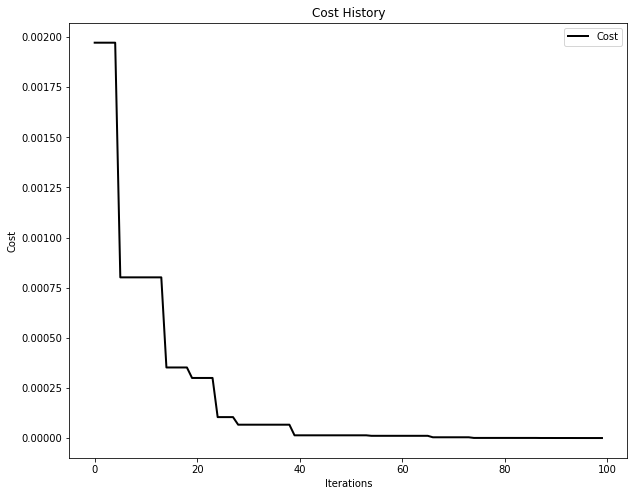

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [4]:
from pyswarms.utils.plotters.formatters import Mesher

m = Mesher(func = fx.sphere)

In [5]:
%%capture
# make animation
animation = plot_contour(
    pos_history=optimizer.pos_history,
    mesher=m,
    mark=(0,0)
)

In [6]:
# enable us to view it in jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)

2021-02-11 13:36:41,542 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2021-02-11 13:36:41,552 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x576 -depth 8 -delay 10.0 -loop 0 rgba:- plot0.gif


In [7]:
Image(url='plot0.gif')

In [8]:
## plotting3D
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

In [9]:
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1, 1)], label = ['x-axis', 'y-axis', 'z-axis'])

In [11]:
%%capture
animation3d = plot_surface(
    pos_history=pos_history_3d,
    mesher=m, designer=d,
    mark=(0,0,0)
)

In [12]:
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')

2021-02-11 13:42:42,704 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2021-02-11 13:42:42,760 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x576 -depth 8 -delay 10.0 -loop 0 rgba:- plot1.gif
